# Linear Regression预测房价

In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from sklearn.linear_model import LinearRegression # sk-learn库Linear Regression模型
from sklearn.model_selection import train_test_split # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库
import math #数学库

从../input/kc_house_data.csv文件中读入数据

In [2]:
data = pd.read_csv("./kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

获得自变量X和因变量Y

In [4]:
X = data[['bedrooms','bathrooms','sqft_living','floors']]
Y = data['price']

获得2:1的训练：测试数据比例

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=0)

In [6]:
xtrain = np.asmatrix(xtrain)
xtest = np.asmatrix(xtest)
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

观察房价和生活面积的关系

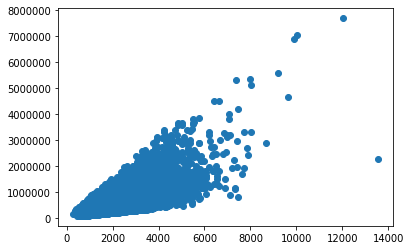

In [7]:
plt.scatter(X['sqft_living'], Y)
plt.show()

观察生活面积分布

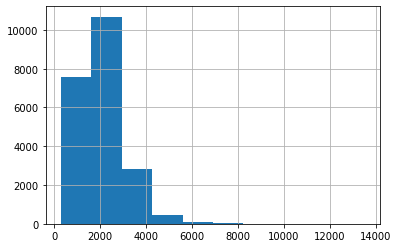

In [8]:
X['sqft_living'].hist()
plt.show()

用xtrain和ytrain训练模型

In [9]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-51118.881973
1,bathrooms,4146.343826
2,sqft_living,300.225555
3,floors,5226.700983


In [11]:
model.intercept_

71317.92892233701

In [12]:
#一个房子，3个卧室，2个卫生间，2500sqft，2层楼
#放入bias 1
model.predict([[3,2,2500,2]])

array([687271.26074668])

训练集上的均方差MSE

In [13]:
pred = model.predict(xtrain)
((pred-ytrain)*(pred-ytrain)).sum() / len(ytrain)

64954234066.3795

In [14]:
metrics.mean_squared_error(ytrain, pred)

64954234066.3795

In [15]:
#平均相对误差
(abs(pred-ytrain)/ytrain).sum() / len(ytrain)

0.3505482583370651

测试集合上的MSE

In [16]:
predtest = model.predict(xtest)
((predtest-ytest)*(predtest-ytest)).sum() / len(ytest)

69651448893.86037

In [17]:
(abs(predtest-ytest)/ytest).sum() / len(ytest)

0.34624369015230416